In [1]:
import pandas as pd
import numpy as np

rfm = pd.read_csv("../data/processed/rfm_features.csv", index_col=0)

rfm.head()

,Recency,Frequency,Monetary,UniqueProducts,TotalQuantity,AvgOrderValue,Cluster
CustomerID,,,,,,,
12346.0,326,0.693147,11.253955,0.693147,11.214735,11.253955,1
12347.0,2,2.079442,8.368925,4.644391,7.807510,3.206047,1
12348.0,75,1.609438,7.494564,3.135494,7.758761,4.077122,1
12349.0,19,0.693147,7.472245,4.304065,6.448889,3.221912,2
12350.0,310,0.693147,5.815324,2.890372,5.288267,3.028712,0


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

rfm_scaled[:5]

array([[ 2.33457414, -0.95521426,  3.70622476, -2.52637584,  3.81665325,
         9.64498596, -0.34306512],
       [-0.90534032,  1.07442519,  1.41184341,  0.96588114,  1.32948521,
         0.26081225, -0.34306512],
       [-0.17535959,  0.38630445,  0.7164889 , -0.36773818,  1.29389959,
         1.27651973, -0.34306512],
       [-0.73534481, -0.95521426,  0.6987394 ,  0.66508847,  0.33773448,
         0.27931224,  0.866867  ],
       [ 2.17457836, -0.95521426, -0.6189622 , -0.58438658, -0.50948367,
         0.05403299, -1.55299725]])

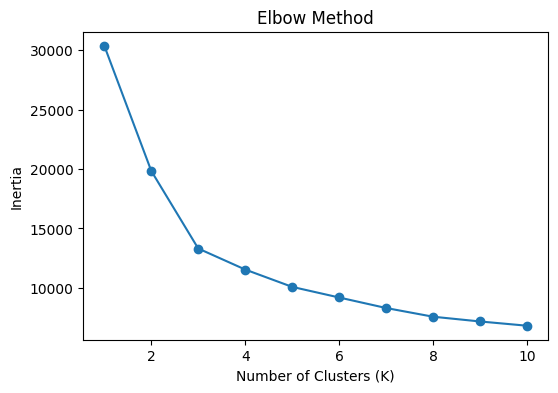

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [4]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.4f}")

K=2, Silhouette Score=0.3238
K=3, Silhouette Score=0.3825
K=4, Silhouette Score=0.3031
K=5, Silhouette Score=0.3111
K=6, Silhouette Score=0.2828


In [5]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Recency,Frequency,Monetary,UniqueProducts,TotalQuantity,AvgOrderValue,Cluster
CustomerID,,,,,,,
12346.0,326,0.693147,11.253955,0.693147,11.214735,11.253955,2
12347.0,2,2.079442,8.368925,4.644391,7.807510,3.206047,2
12348.0,75,1.609438,7.494564,3.135494,7.758761,4.077122,2
12349.0,19,0.693147,7.472245,4.304065,6.448889,3.221912,0
12350.0,310,0.693147,5.815324,2.890372,5.288267,3.028712,1


In [6]:
cluster_summary = rfm.groupby("Cluster").mean()
cluster_summary|

SyntaxError: invalid syntax (95151878.py, line 2)

In [7]:
cluster_summary = rfm.groupby("Cluster").mean()
cluster_summary

,Recency,Frequency,Monetary,UniqueProducts,TotalQuantity,AvgOrderValue
Cluster,,,,,,
0,52.787362,1.145949,6.298345,3.415819,5.752614,2.882744
1,242.364334,0.821205,5.507477,2.620711,4.714967,3.035799
2,30.340728,2.214907,8.166853,4.674169,7.612106,3.124584


In [8]:
rfm["Cluster"].value_counts(normalize=True) * 100

Cluster
0    49.976948
2    25.979714
1    24.043338
Name: proportion, dtype: float64

In [9]:
rfm.to_csv("../data/processed/rfm_clustered.csv")

In [10]:
cluster_summary.to_csv("../results/cluster_summary.csv")

In [11]:
customer_distribution = rfm["Cluster"].value_counts(normalize=True) * 100
customer_distribution.to_csv("../results/customer_distribution.csv")